# Uday  Bhuvad

# Task 1- Prediction using Supervised Machine Learning 
Objective:- To predict the Score in exam if student study for 9.25 hours in a day

In [123]:
import pandas as pd     #import library

In [2]:
import numpy as np

In [3]:
from matplotlib import pyplot as plt

In [4]:
from sklearn.model_selection import train_test_split

In [109]:
from sklearn.linear_model import LinearRegression

In [110]:
from sklearn import metrics

In [18]:
import seaborn as sns

In [120]:
from scipy import stats

In [8]:
path="http://bit.ly/w-data"    #import data

In [9]:
data=pd.read_csv(path)

In [10]:
data.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [11]:
data.tail()

,Hours,Scores
20,2.7,30
21,4.8,54
22,3.8,35
23,6.9,76
24,7.8,86


In [12]:
data.columns

Index(['Hours', 'Scores'], dtype='object')

In [13]:
data.shape

(25, 2)

In [14]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 464.0 bytes
None


In [27]:
data.describe()


,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


# Visualization

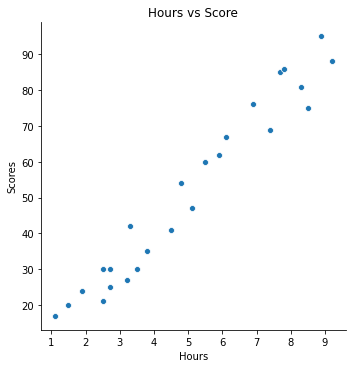

From the above Scatter plot we can see that there exist a linear relationship between the variables


In [23]:
sns.relplot(x='Hours',y='Scores',data=data)   #visualization od data
plt.title("Hours vs Score")
plt.show()
print("From the above Scatter plot we can see that there exist a linear relationship between the variables")

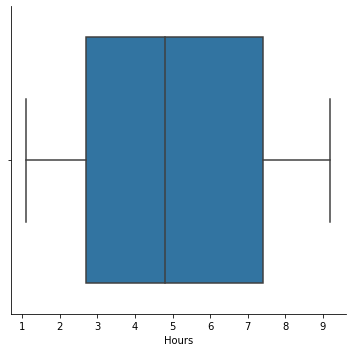

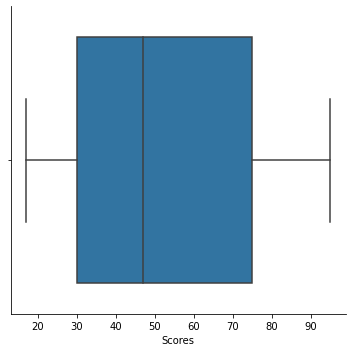

In [31]:
sns.catplot("Hours",data=data,kind='box')
sns.catplot("Scores",data=data,kind='box')


There is no outlier present in data set so we can do further analysis

In [32]:
cor=data.corr()

In [33]:
cor

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


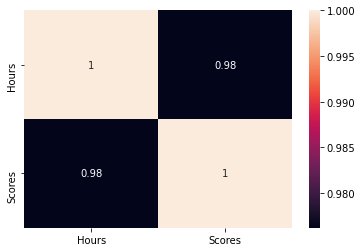

In [34]:
sns.heatmap(cor,annot=True)
plt.show()

From Above Heatmap and Cor table we clearly see that the strong positive correlation between Hours and scores

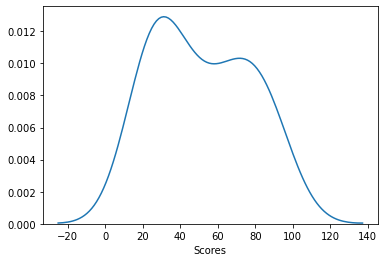

In [37]:
sns.distplot(data['Scores'],hist=False)      #plotting distribution of score of the data

From above Kde plot we can see that Score distributed normally

# Preparing the Data

In [84]:
x=data.iloc[:,:-1].values
y=data.iloc[:,1].values

# Train Test Split

In [85]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)
print(f"The size of the train data and test data is{x_train.size,y_train.size,x_test.size,y_test.size}")

The size of the train data and test data is(20, 20, 5, 5)


In [86]:
reg=LinearRegression()
model=reg.fit(x_train,y_train)

In [87]:
print(model.coef_),print(model.intercept_)

[9.91065648]
2.018160041434669


(None, None)

# The Best fit of the Line is Score=2.018 + 9.912 * Hours
   

# Plotting the Model

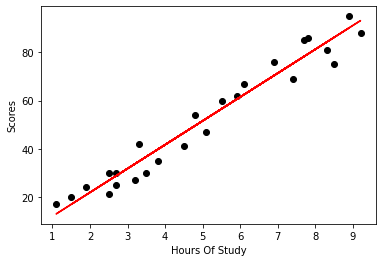

In [88]:
 line=reg.coef_*train+ reg.intercept_  #plotting the regresssion line
plt.scatter(train,test,Color='black')
plt.plot(train,line,color="red")
plt.xlabel("Hours Of Study")
plt.ylabel("Scores")
plt.show()

# Prediction

In [89]:
y_pred=model.predict(x_test)
y_pred

array([16.88414476, 33.73226078, 75.357018  , 26.79480124, 60.49103328])

In [91]:
pd.DataFrame({'Actual':y_test,'predict':y_pred})   # comparing Actual Vs predicted

,Actual,predict
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


In [97]:
Hours=9.25
predict_Score=model.predict([[Hours]])
predict_Score
print('Number of Hours=9.25')
print("predict Score=",format(predict_Score[0]))

Number of Hours=9.25
predict Score= 93.69173248737538


In [118]:
print('Mean Absolute Error:',round(metrics.mean_absolute_error(y_test,y_pred)),3)
print('Mean Squared Error:',round(metrics.mean_squared_error(y_test,y_pred)),3)
print('Root Mean Squared Error:',round(np.sqrt(metrics.mean_squared_error(y_test,y_pred)),3))

Mean Absolute Error: 4.0 3
Mean Squared Error: 22.0 3
Root Mean Squared Error: 4.647


The value of root mean squared error is 4.647 which is less than 10% of the mean of percentage of all the student(51.48)

# R-Squared value

In [121]:
slope,inter,r,p,std=stats.linregress(y_test,y_pred)
print('R-Squared Value:',r)

R-Squared Value: 0.9806835759589493


# Here  R -Squared = 0.9806 means the model explain 98.06% of the variability in the dependent variable(Score) by Independent variable(Hours)

# Thank You